In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT

path = '../datasets/ETTh1.csv'

start = 0
length_in = 168
length_out = 24


def show(data, start, length_in = 168, length_out = 24, cols=None):


    data = data.iloc[start:start + length_in + length_out]
    plt.figure(figsize=(12, 6))
    for col in (cols if cols is not None else data.columns):
        plt.plot(data.index, data[col], label=col)
        # print("col", col)

    plt.axvline(x=data.index[length_in], color='red', linestyle='--', label='divide line')

    plt.xlabel('date')
    plt.ylabel('value')
    plt.title('ETTh1 Dataset')
    plt.legend()
    plt.xticks(data.index[::24], rotation=45)
    plt.tight_layout()
    plt.show()

data = pd.read_csv(path)
# 将 datetime 列转换为 datetime 对象
data['date'] = pd.to_datetime(data['date'])
# 将 datetime 列设置为索引
data.set_index('date', inplace=True)

print("readed\n", data.head())

# save the figure
# plt.savefig('ETTh1_dataset.png')


# print(data.head())

readed
                       HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
date                                                                    
2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000


In [2]:
import numpy as np

In [29]:
def encode_time(df):
    df['hour'] = df.index.hour
    df['month'] = df.index.month
    
    df['time_stamp'] = df.index.map(lambda x: int(x.timestamp()) / 3600)

    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['weekday_sin'] = np.sin(2 * np.pi * df['time_stamp'] / (24 * 7))
    # df['weekday_sin'] = np.sin(2 * np.pi * df.index.weekday / 7)

    # drop the original columns
    df.drop(['hour', 'month', 'time_stamp'], axis=1, inplace=True)

    return df

data = encode_time(data)
print("data with hour, weekday, month\n", data.head())

data with hour, weekday, month
                       HUFL   HULL   MUFL   MULL   LUFL   LULL         OT  \
date                                                                       
2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000   
2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001   
2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001   
2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001   
2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000   

                     hour_sin  weekday_sin  
date                                        
2016-07-01 00:00:00  0.000000     0.781831  
2016-07-01 01:00:00  0.258819     0.804598  
2016-07-01 02:00:00  0.500000     0.826239  
2016-07-01 03:00:00  0.707107     0.846724  
2016-07-01 04:00:00  0.866025     0.866025  


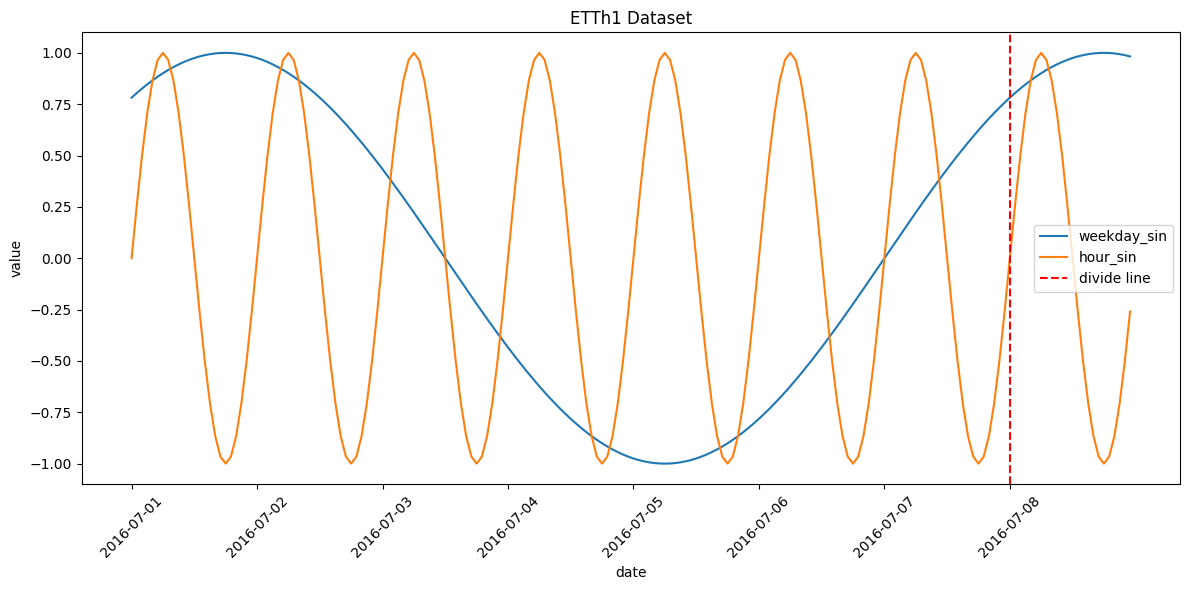

In [30]:
show(data, 0, cols=['weekday_sin', 'hour_sin'])

In [31]:
# save data to csv
data.to_csv('../datasets/ETTh1_time2.csv', index=True)